In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('insurance (1).csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Постановка гипотезы
Разделим выборку на две по возрасту. Сравниваем индекс массы тела.
</br> Н0 - средний bmi людей до 35 лет равен bmi людей старше 35 лет
</br> Н1 - средний bmi людей до 35 лет <font color='yellow'>  не </font> равен bmi людей старше 35 лет 

In [96]:
data['age'].max(), data['age'].min(),data['age'].mean()

(64, 18, 39.20702541106129)

In [97]:
ex = data.loc[data['smoker'] == "yes"]

In [98]:
ex_1 = ex.loc[ex['age'] <= 35]

In [99]:
ex_2 = ex.loc[ex['age'] > 35]

In [100]:
ex_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000


Text(0.5, 1.0, ' > 35')

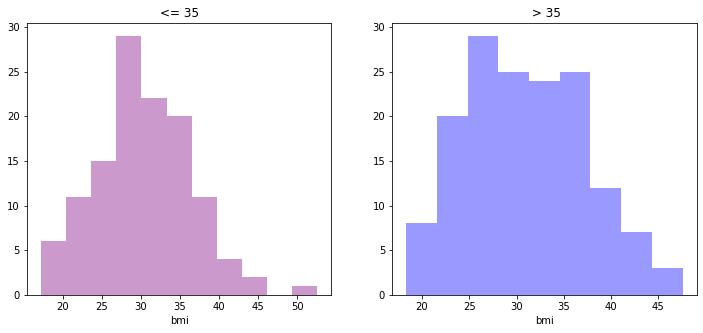

In [132]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(ex_1.iloc[:, 2],color = 'purple',hist = True, kde = False,ax = ax)
ax.set_title('<= 35')

ax=f.add_subplot(122)
sns.distplot(ex_2.iloc[:, 2],color = 'blue',hist = True, kde = False,ax=ax)
ax.set_title(' > 35')

In [143]:
a = list(ex_2.iloc[:, 2])
b = list(ex_1.iloc[:, 2])
c = list()

In [144]:
for i in a:
    if not (i in b):
        c.append(i)

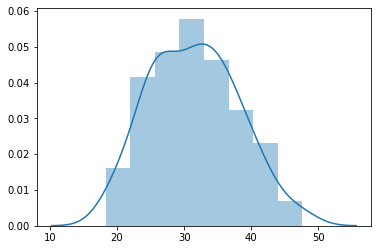

In [146]:
sns.distplot(c)

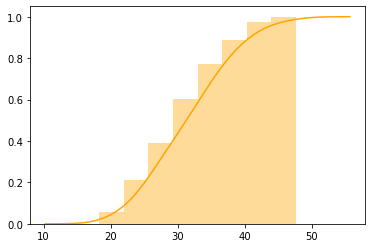

In [148]:
kwargs = {'cumulative': True}
sns.distplot(c, hist = True,hist_kws=kwargs, kde_kws=kwargs, color = 'orange')

In [149]:
stats.norm.cdf(np.mean(c),np.mean(c),np.std(c))

0.5

In [153]:
stats.norm.cdf(45,np.mean(c),np.std(c))

0.9812253892624826

In [162]:
p_val = 1 - stats.norm.cdf(45,np.mean(c),np.std(c))
if p_val > 0.05:
    print('Принимаем нулевую гипотезу ','\np-value = ',p_val)
else:
     print('Отвергаем нулевую гипотезу ','\np-value = ',p_val)

Отвергаем нулевую гипотезу  
p-value =  0.018774610737517405


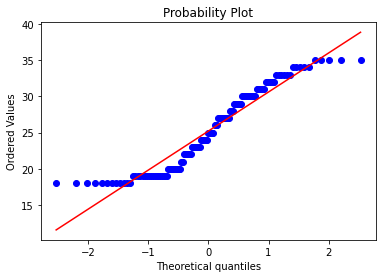

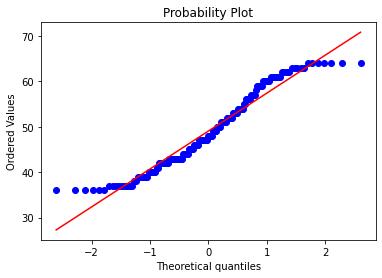

In [169]:
stats.probplot(ex_1.iloc[:, 0], dist="norm", plot=plt)
plt.show()

stats.probplot(ex_2.iloc[:, 0], dist="norm", plot=plt)
plt.show()

## Постановка гипотезы_2
Разделим выборку на две по половому признаку. 
</br> Н0 - средний возраст курящих мужчин равен среднему возрасту курящих женщин
</br> Н1 - средний возраст курящих мужчин <font color='yellow'>  не </font> равен среднему возрасту курящих женщин

In [104]:
female = data.loc[data['sex'] == "female"]

In [105]:
female = female.loc[female['smoker'] == "yes"]

In [107]:
male = data.loc[data['sex'] == "male"]

In [108]:
male = male.loc[male['smoker'] == "yes"]

Text(0.5, 1.0, 'male')

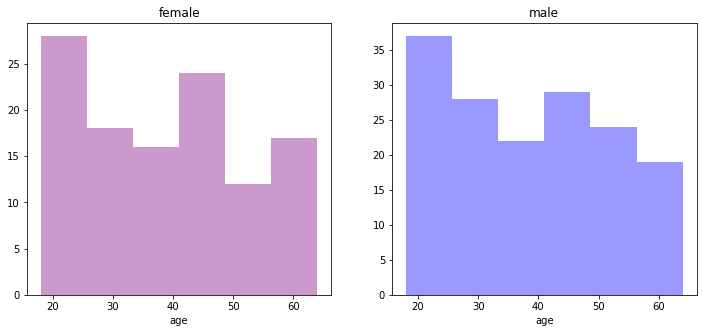

In [110]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(female.iloc[:, 0],color = 'purple',hist = True, kde = False,ax = ax)
ax.set_title('female')

ax=f.add_subplot(122)
sns.distplot(male.iloc[:, 0],color = 'blue',hist = True, kde = False,ax=ax)
ax.set_title('male')

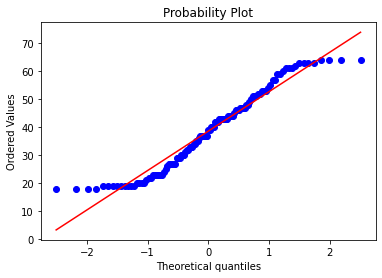

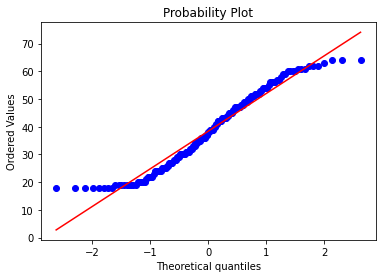

In [168]:
stats.probplot(female.iloc[:, 0], dist="norm", plot=plt)
plt.show()

stats.probplot(male.iloc[:, 0], dist="norm", plot=plt)
plt.show()

In [125]:
mu = np.mean(female.iloc[:, 0])

In [127]:
mu1= np.mean(male.iloc[:, 0])

In [130]:
diff = mu - mu1

In [131]:
diff, mu, mu1

(0.16215477167077097, 38.608695652173914, 38.44654088050314)

In [163]:
#количество элементов в выборках
n1 = len(female.iloc[:, 0])
n2 = len(male.iloc[:, 0])

#дисперсии
var_a = np.var(female.iloc[:, 0],ddof = 1)
var_b = np.var(male.iloc[:, 0],ddof = 1)

#стандартные отклонения
sd_a = np.sqrt(var_a)
sd_b = np.sqrt(var_b)

#стандартная ошибка разности средних
sem = np.sqrt(sd_a**2/n1 + sd_b**2/n2)

print('Стандартная ошибка разности средних = ',sem)

Стандартная ошибка разности средних =  1.7166781438719736


In [165]:
t = diff/sem
print('t-критерий =',t)

t-критерий = 0.09445845876794955


In [167]:
t2, p2 = stats.ttest_ind(female.iloc[:, 0], male.iloc[:, 0])
if p2 > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t2,'\np-value =',p2)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t2,'\np-value =',p2)

Нет статистически значимой разницы 
t - критерий =  0.0949672035305086 
p-value = 0.9244108005609346


In [174]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)

stat, p = mannwhitneyu(female.iloc[:, 0], male.iloc[:, 0])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('fail to reject H0')
else:
	print('reject H0')

Statistics=9096.000, p=0.472
fail to reject H0
